### Классификационные деревья

In [109]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
wbc = pd.read_csv('wbc.csv')
print(wbc.head())

         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]


In [110]:
X = wbc.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1).values
y = wbc['diagnosis'].values
print(X.shape, y.shape)

(569, 30) (569,)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18, stratify=y)
dt = DecisionTreeClassifier(max_depth=2, random_state=18)

In [112]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8947368421052632


### Набор данных Universalbank

In [113]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
df = pd.read_csv('UniversalBank.csv')
print(df.head())

   Row  Age  Experience  ...  CD Account  Online  CreditCard
0    1   25           1  ...           0       0           0
1    2   45          19  ...           0       0           0
2    3   39          15  ...           0       0           0
3    4   35           9  ...           0       0           0
4    5   35           8  ...           0       0           1

[5 rows x 14 columns]


In [114]:
X = df.drop(['Row', 'ZIP Code', 'Personal Loan'], axis=1)
y = df['Personal Loan'].values
print(X.shape, y.shape)

(5000, 11) (5000,)


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18, stratify=y)
dt = DecisionTreeClassifier(max_depth=3, random_state=18, criterion='entropy')

In [116]:
dt.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,18
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


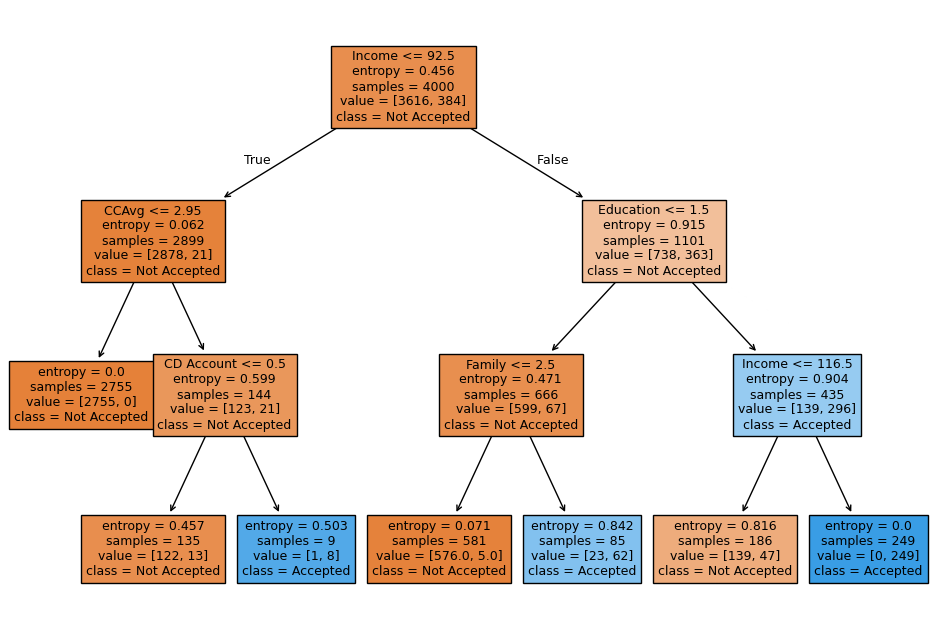

In [117]:
plt.figure(figsize=(12,8))
plot_tree(dt, filled=True, class_names=['Not Accepted', 'Accepted'], feature_names=list(X.columns))
plt.show()

### Набор данных mushrooms

In [118]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('mushrooms.csv')
print(data.head())

  class cap-shape cap-surface  ... spore-print-color population habitat
0     p         x           s  ...                 k          s       u
1     e         x           s  ...                 n          n       g
2     e         b           s  ...                 n          n       m
3     p         x           y  ...                 k          s       u
4     e         x           s  ...                 n          a       g

[5 rows x 23 columns]


In [119]:
print(data.shape)

(8124, 23)


### Создание численных переменных OHE (One-Hot-Encoding)

In [120]:
data_encoded = pd.get_dummies(data, drop_first=True)
print(data_encoded.head())

   class_p  cap-shape_c  cap-shape_f  ...  habitat_p  habitat_u  habitat_w
0     True        False        False  ...      False       True      False
1    False        False        False  ...      False      False      False
2    False        False        False  ...      False      False      False
3     True        False        False  ...      False       True      False
4    False        False        False  ...      False      False      False

[5 rows x 96 columns]


In [121]:
X = data_encoded.drop('class_p', axis=1)
y = data_encoded['class_p']
print(X.columns.values)
print(X.shape)

['cap-shape_c' 'cap-shape_f' 'cap-shape_k' 'cap-shape_s' 'cap-shape_x'
 'cap-surface_g' 'cap-surface_s' 'cap-surface_y' 'cap-color_c'
 'cap-color_e' 'cap-color_g' 'cap-color_n' 'cap-color_p' 'cap-color_r'
 'cap-color_u' 'cap-color_w' 'cap-color_y' 'bruises_t' 'odor_c' 'odor_f'
 'odor_l' 'odor_m' 'odor_n' 'odor_p' 'odor_s' 'odor_y' 'gill-attachment_f'
 'gill-spacing_w' 'gill-size_n' 'gill-color_e' 'gill-color_g'
 'gill-color_h' 'gill-color_k' 'gill-color_n' 'gill-color_o'
 'gill-color_p' 'gill-color_r' 'gill-color_u' 'gill-color_w'
 'gill-color_y' 'stalk-shape_t' 'stalk-root_b' 'stalk-root_c'
 'stalk-root_e' 'stalk-root_r' 'stalk-surface-above-ring_k'
 'stalk-surface-above-ring_s' 'stalk-surface-above-ring_y'
 'stalk-surface-below-ring_k' 'stalk-surface-below-ring_s'
 'stalk-surface-below-ring_y' 'stalk-color-above-ring_c'
 'stalk-color-above-ring_e' 'stalk-color-above-ring_g'
 'stalk-color-above-ring_n' 'stalk-color-above-ring_o'
 'stalk-color-above-ring_p' 'stalk-color-above-ring_w'
 

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18, stratify=y)

In [123]:
dt = DecisionTreeClassifier(max_depth=6, random_state=18, criterion='entropy')
dt.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,18
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [124]:
y_pred_test = dt.predict(X_test)
conf_mtrx = confusion_matrix(y_test, y_pred_test)
print(conf_mtrx)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(accuracy_test)

[[842   0]
 [  0 783]]
1.0


### Визуализация матрицы ошибок

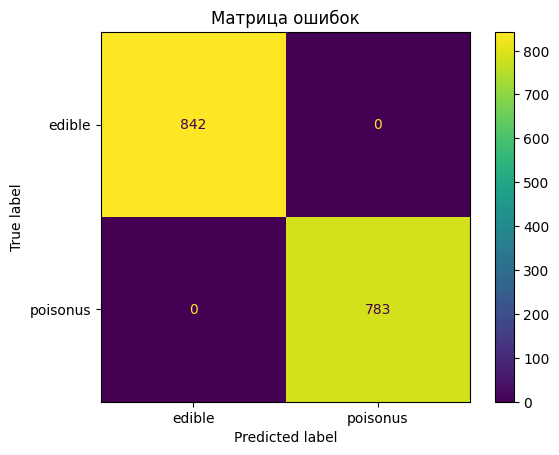

In [125]:
disp = ConfusionMatrixDisplay(conf_mtrx, display_labels=['edible', 'poisonus'])
disp.plot(values_format='d')
plt.title('Матрица ошибок')
plt.show()

### Оценка точности предсказания для train

In [126]:
y_pred_train = dt.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(accuracy_train)


1.0


### Важные признаки

In [127]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt.feature_importances_})
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)
print(top_features)

                       Feature  Importance
22                      odor_n    0.526596
17                   bruises_t    0.224642
50  stalk-surface-below-ring_y    0.073933
42                stalk-root_c    0.065921
27              gill-spacing_w    0.050936


### Визуалиация дерева решений

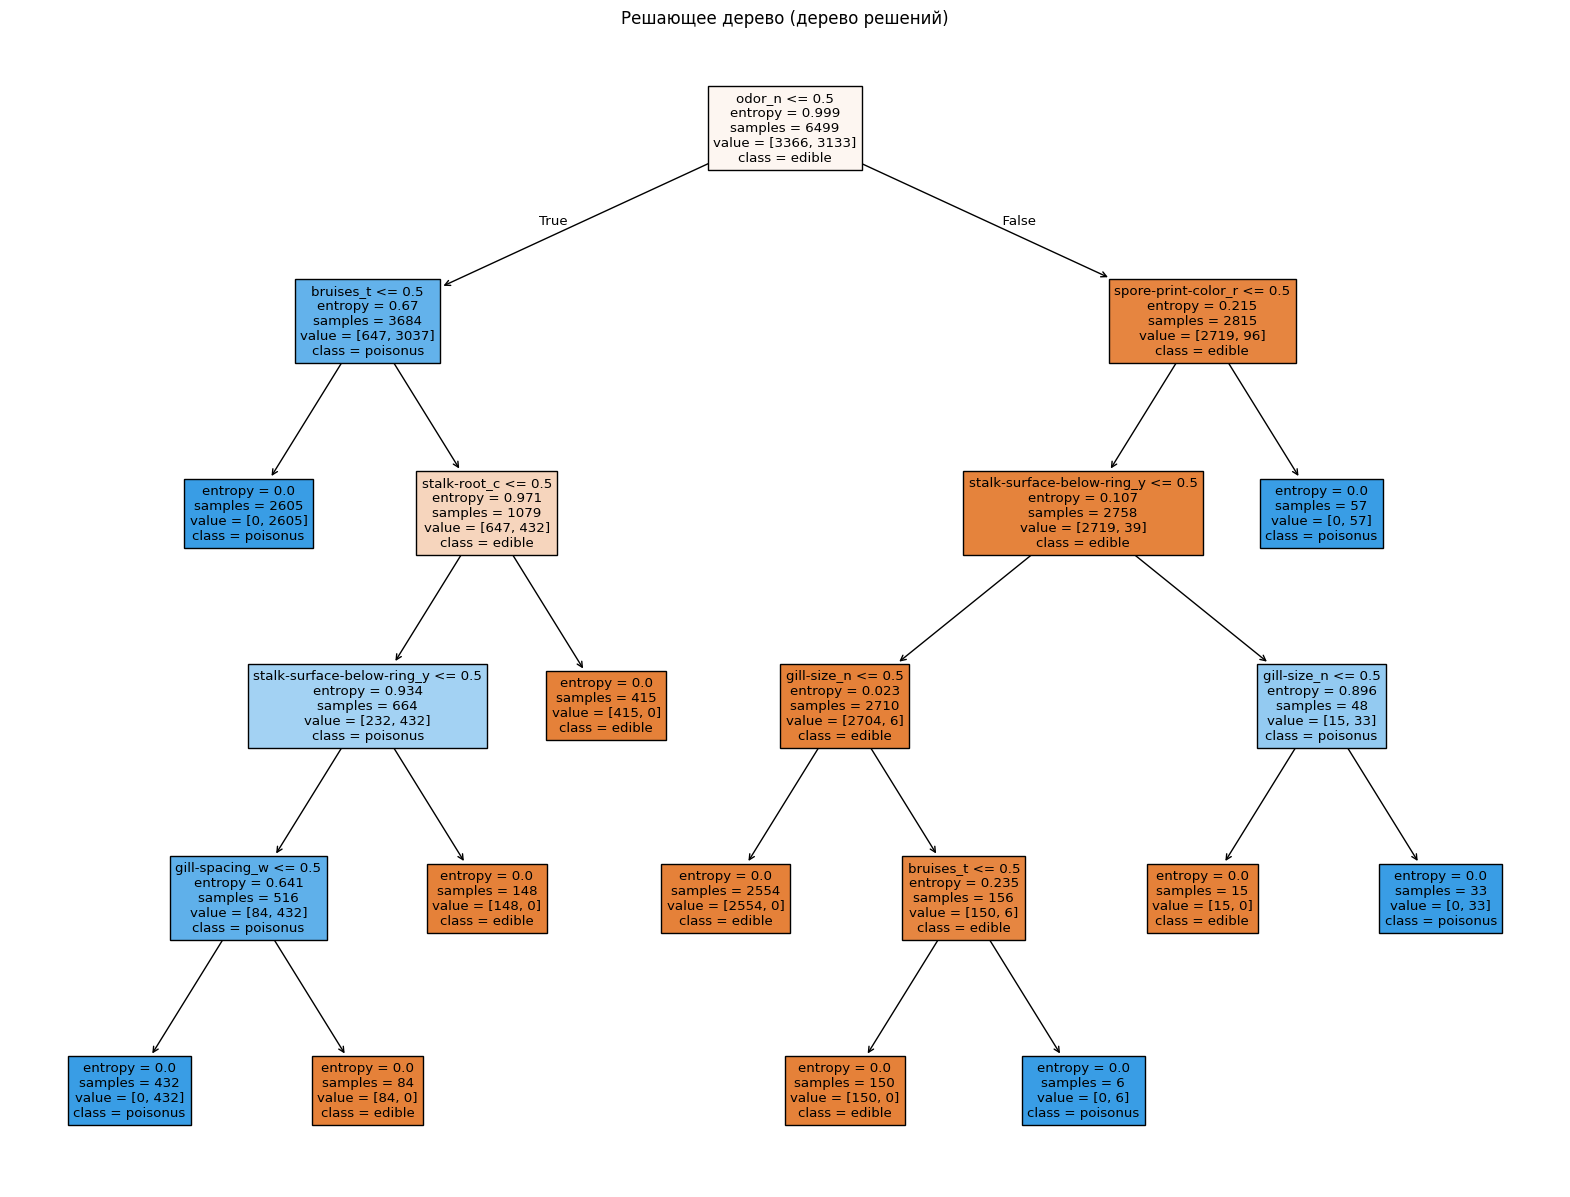

In [128]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, class_names=['edible', 'poisonus'], feature_names=list(dt.feature_names_in_))
plt.title('Решающее дерево (дерево решений)')
plt.show()